In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df = pd.read_csv("data/medical.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df = df.astype({"sex":"string","smoker":"string","region":"string"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   string 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   string 
 5   region    1338 non-null   string 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), string(3)
memory usage: 73.3 KB


In [8]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
encoder = LabelEncoder()
obj_cols = ["sex","smoker","region"]
for i in obj_cols:
    df[i]=encoder.fit_transform(df[i])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

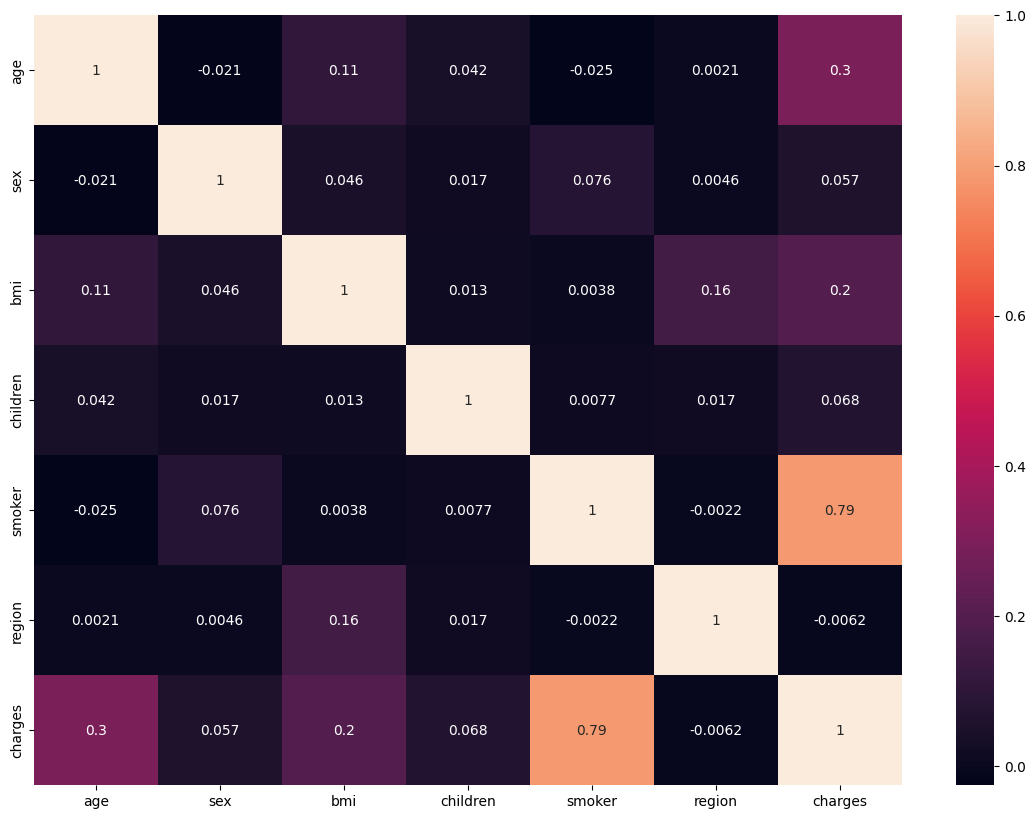

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [12]:
y = df["charges"]
X=df.drop(columns=["charges"])
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [13]:
x_test,x_train,y_test,y_train = train_test_split(X,y,test_size=0.25,random_state=25)

In [14]:
models = [
    ("Decision Tree",DecisionTreeRegressor()),
    ("Random Forest Regressor",RandomForestRegressor()),
    ("K Nearest Neighbour",KNeighborsRegressor()),
    ("Linear Regressor",LinearRegression())
]

In [15]:
for name, model in models:
    print(name)
    print()
    print(model)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))
    print()
    print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
    print()
    print("R2 score: ",r2_score(y_test,y_pred))
    print()

Decision Tree

DecisionTreeRegressor()
Mean Absolute Error:  3173.973861711865

Mean Squared Error:  42668977.98449864

R2 score:  0.7105309953539899

Random Forest Regressor

RandomForestRegressor()
Mean Absolute Error:  2582.5048873581554

Mean Squared Error:  25473121.196057748

R2 score:  0.8271887589965519

K Nearest Neighbour

KNeighborsRegressor()
Mean Absolute Error:  8508.611225567696

Mean Squared Error:  143444553.0411246

R2 score:  0.026863216508464682

Linear Regressor

LinearRegression()
Mean Absolute Error:  4354.10826768298

Mean Squared Error:  39393959.51379332

R2 score:  0.7327489246715558



In [16]:
final_model = models[1][1]
final_model

RandomForestRegressor()

In [17]:
df.columns
# female =0 ,male=1
# 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
p = {
    "age":[19,25,45],
    "sex":[1,0,1],
    "bmi":[32.5,30.8,27],
    "children":[0,2,3],
    "smoker":[0,1,1],
    "region":[3,1,2]}
predict_data = pd.DataFrame(p)
final_model.predict(predict_data)

array([ 1435.3230225, 35308.9368645, 23818.72331  ])

In [19]:
df["region"].unique()

array([3, 2, 1, 0])